# Final project
In this project, the team will study and analyze data based on the Student Performance Factors dataset provided on Kaggle.

Based on data analysis, it will provide a comprehensive overview of the factors affecting students' academic performance in exams.

(Last update: 2/12/2024)

Group

---

## 1. Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
import numpy as np

## 2. Exploring data

In [2]:
df = pd.read_csv('data/data.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


- Determine the number of rows and columns.

In [3]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 6607, Columns: 20


- Identify the attributes in the dataset.

In [4]:
print(df.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


- Determine the data type for each attribute.

In [5]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


- The percentage of missing values

In [6]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64


- Identify the min and max values for numerical attributes. Check if they are abnormal?

In [7]:
print(df.min(numeric_only=True))
print(df.max(numeric_only=True))

Hours_Studied         1
Attendance           60
Sleep_Hours           4
Previous_Scores      50
Tutoring_Sessions     0
Physical_Activity     0
Exam_Score           55
dtype: int64
Hours_Studied         44
Attendance           100
Sleep_Hours           10
Previous_Scores      100
Tutoring_Sessions      8
Physical_Activity      6
Exam_Score           101
dtype: int64


## 3. Preprocessing

- Remove duplicate and missing data columns

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

- Perform data mapping and normalization.

In [9]:
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

binary_mapping = {
    'Yes': 1,
    'No': 0,
    'Public': 0,
    'Private': 1,
    'Male': 0,
    'Female': 1
}

peer_influence_mapping = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}

parental_education_mapping = {
    'High School': 0,
    'College': 1,
    'Postgraduate': 2
}

distance_mapping = {
    'Near': 0,
    'Moderate': 1,
    'Far': 2
}

df['Parental_Involvement'] = df['Parental_Involvement'].map(ordinal_mapping)
df['Access_to_Resources'] = df['Access_to_Resources'].map(ordinal_mapping)
df['Motivation_Level'] = df['Motivation_Level'].map(ordinal_mapping)
df['Family_Income'] = df['Family_Income'].map(ordinal_mapping)
df['Teacher_Quality'] = df['Teacher_Quality'].map(ordinal_mapping)

df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(binary_mapping)
df['Internet_Access'] = df['Internet_Access'].map(binary_mapping)

df['School_Type'] = df['School_Type'].map(binary_mapping)

df['Peer_Influence'] = df['Peer_Influence'].map(peer_influence_mapping)

df['Parental_Education_Level'] = df['Parental_Education_Level'].map(parental_education_mapping)

df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_mapping)

df['Gender'] = df['Gender'].map(binary_mapping)

df['Learning_Disabilities'] = df['Learning_Disabilities'].map(binary_mapping)

In [10]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,0,2,3,0,0,0,0,67
1,19,64,0,1,0,8,59,0,1,2,1,1,0,0,4,0,1,1,1,61
2,24,98,1,1,1,7,91,1,1,2,1,1,0,1,4,0,2,0,0,74
3,29,89,0,1,1,8,98,1,1,1,1,1,0,0,4,0,0,1,0,71
4,19,92,1,1,1,6,65,1,1,3,1,2,0,1,4,0,1,0,1,70
5,19,88,1,1,1,8,89,1,1,3,1,1,0,2,3,0,2,0,0,71
6,29,84,1,0,1,7,68,0,1,1,0,1,1,1,2,0,0,1,0,67
7,25,78,0,2,1,6,50,1,1,1,2,2,0,0,2,0,0,2,0,66
8,17,94,1,2,0,6,80,2,1,0,1,0,1,1,1,0,1,0,0,69
9,23,98,1,1,1,8,71,1,1,0,2,2,0,2,5,0,0,1,0,72


## 4. Exploratory Data Analyst Questions

### 1. How does the combination of "Parental Involvement", "Attendance", and "Parental Education Level" affect students' "Exam Score"?

**Purpose**: Understand the interaction between parental involvement, attendance, and education level in influencing academic performance (exam scores).

**Steps**:
* **Data Preprocessing**: Convert categorical variables like "Parental Involvement" and "Parental Education Level" into numeric forms for analysis.
* **Multivariate Analysis**: Perform a correlation analysis to explore how these factors interact. Use scatter plots or 3D plots to visualize relationships.
* **Regression Analysis**: Use multiple linear regression or random forest regression to model the relationship between these features and the exam score.
* **Interaction Terms**: Introduce interaction terms in the regression to capture the combined effects of these features.

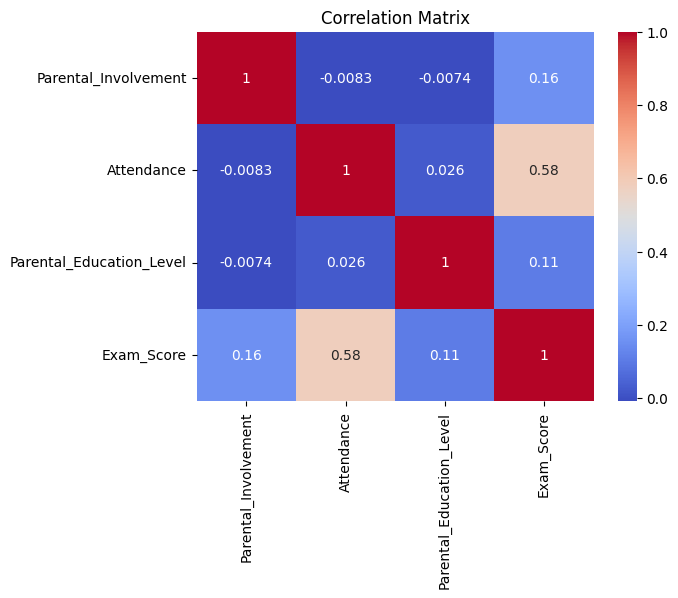

In [11]:
correlation = df[['Parental_Involvement', 'Attendance', 'Parental_Education_Level', 'Exam_Score']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

The chart shows the correlation levels between variables:

- **Attendance and Exam_Score**: There is a relatively strong positive correlation (0.58), indicating that students with higher attendance rates tend to achieve higher exam scores.
- **Parental_Involvement and Exam_Score**: There is a weak positive correlation (0.16), suggesting that parental involvement has a small impact on exam scores.
- **Parental_Education_Level and Exam_Score**: There is a very weak positive correlation (0.11), indicating that the educational level of parents has minimal influence on exam scores.
- The remaining variable pairs have correlation coefficients close to 0, showing no significant relationship between them.

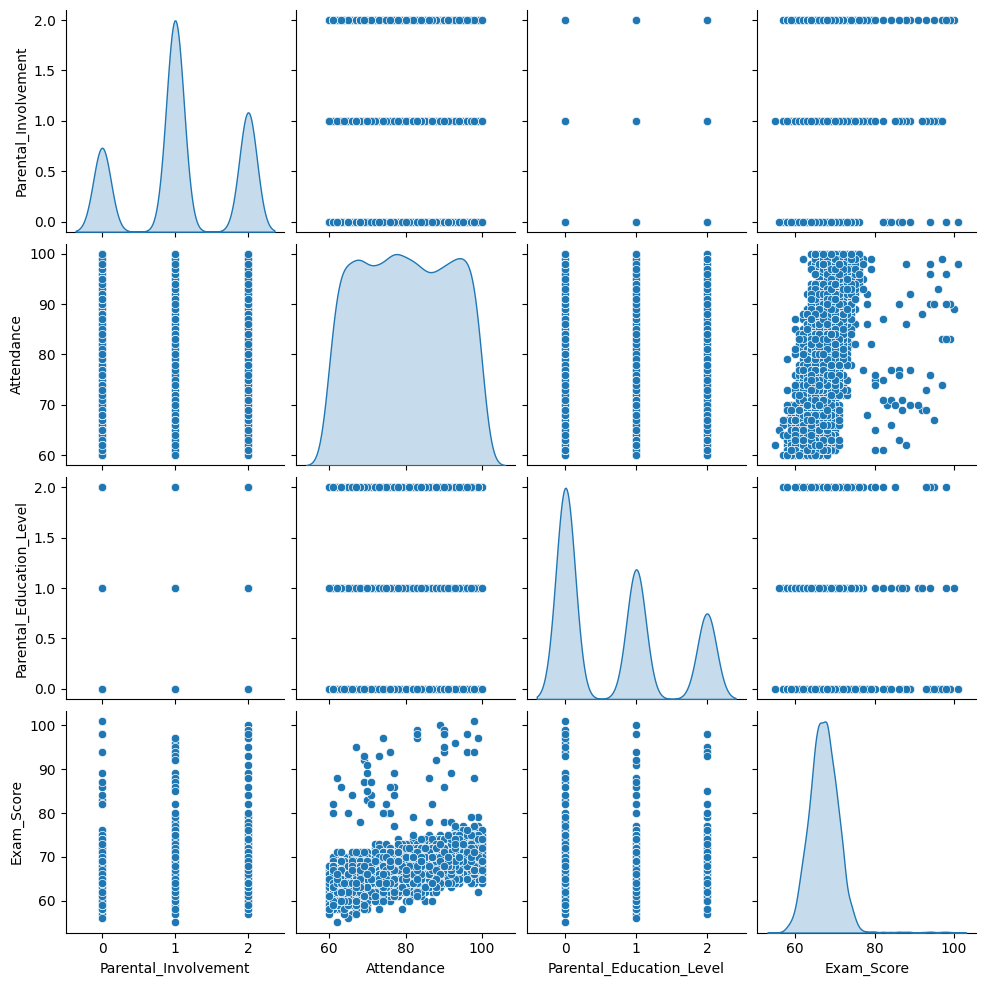

In [12]:
# Pair Plot
sns.pairplot(df[['Parental_Involvement', 'Attendance', 'Parental_Education_Level', 'Exam_Score']], diag_kind='kde')
plt.show()

In [13]:
df['Attendance_x_Parental_Involvement'] = df['Attendance'] * df['Parental_Involvement']
df['Attendance_x_Parental_Education_Level'] = df['Attendance'] * df['Parental_Education_Level']
df['Parental_Involvement_x_Parental_Education_Level'] = df['Parental_Involvement'] * df['Parental_Education_Level']

X = df[['Parental_Involvement', 'Attendance', 'Parental_Education_Level', 
        'Attendance_x_Parental_Involvement', 'Attendance_x_Parental_Education_Level',
        'Parental_Involvement_x_Parental_Education_Level']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression R²: 0.3979846068045173


The regression model explains 39.8% of the variance in exam scores, indicating that factors such as Attendance, Parental Involvement, and Parental Education Level have an impact but are not strong enough.

In [14]:
formula = "Exam_Score ~ Parental_Involvement + Attendance + Parental_Education_Level + " \
          "Attendance_x_Parental_Involvement + Attendance_x_Parental_Education_Level + " \
          "Parental_Involvement_x_Parental_Education_Level"
model = ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     627.0
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:34:27   Log-Likelihood:                -16273.
No. Observations:                6378   AIC:                         3.256e+04
Df Residuals:                    6371   BIC:                         3.261e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

The regression results indicate that the model explains 37.1% of the variance in exam scores, with key factors including Attendance (the strongest impact, p < 0.001), Parental Involvement, and Parental Education Level (both having small but statistically significant impacts). However, the interaction variables are not statistically significant (p > 0.05) and could be removed to simplify the model. Additional factors should be included to improve the predictive accuracy of the model.

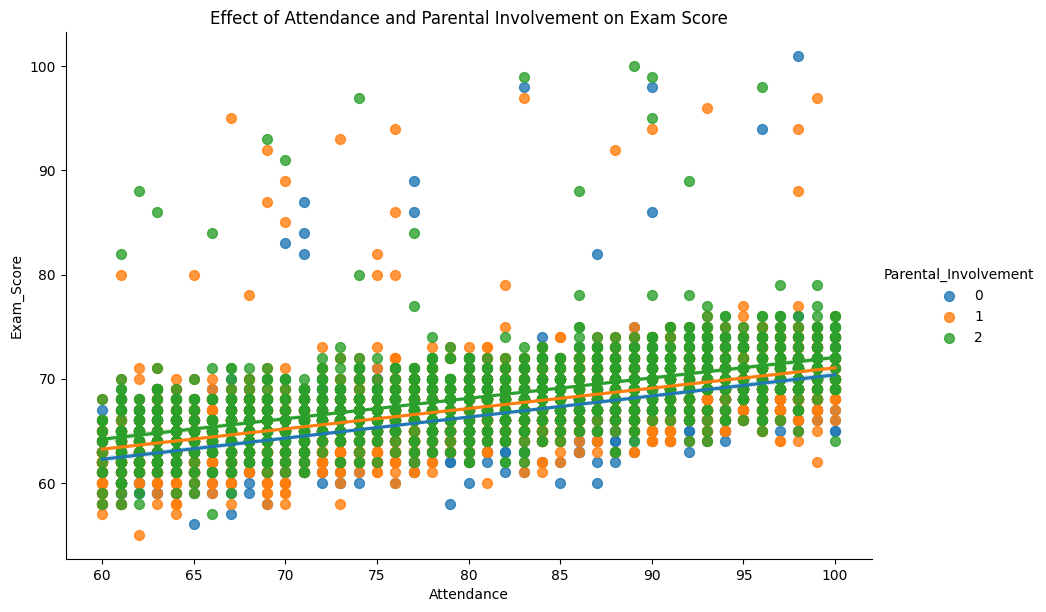

In [15]:
sns.lmplot(x='Attendance', y='Exam_Score', hue='Parental_Involvement', data=df, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title('Effect of Attendance and Parental Involvement on Exam Score')
plt.show()

Attendance has a positive relationship with exam scores, but this relationship depends on the level of parental involvement.
Parental involvement is a crucial factor that has a stronger impact on exam scores compared to attendance alone.

### 2. What impact does "Physical Activity" have on "Exam Score" when considering "Sleep Hours" and "Motivation Level" as moderators?

**Purpose**: Explore whether physical activity is an effective predictor of exam scores, especially when adjusted for sleep hours and motivation level, which could act as moderators.

**Steps**:
* **Data Preprocessing**: Convert categorical variables like "Physical Activity" and "Motivation Level" into numeric values.
* **Correlation Matrix**: Explore correlations between "Physical Activity", "Sleep Hours", "Motivation Level", and "Exam_Score".
* **Moderation Analysis**: Use a regression model with "Physical Activity", "Sleep Hours", and "Motivation Level" as predictors to see how they interact.
* **Visualization**: Create scatter plots or interaction plots to visualize the moderating effects.

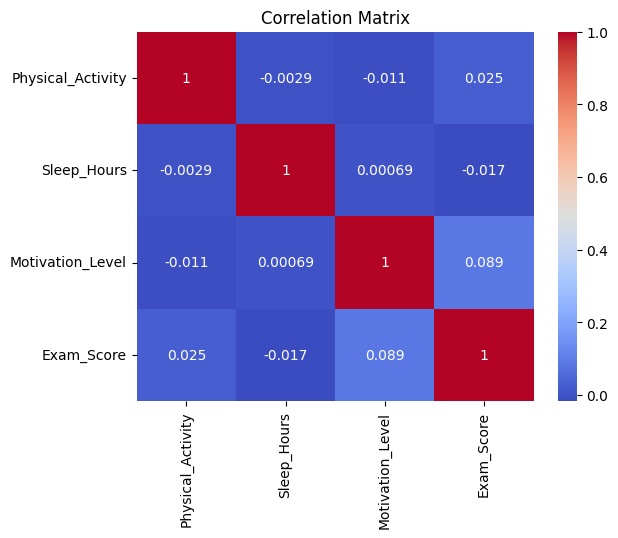

In [16]:
correlation = df[['Physical_Activity', 'Sleep_Hours', 'Motivation_Level', 'Exam_Score']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Observation:
- Physical_Activity and Exam_Score: A weak positive correlation (0.025). This suggests that physical activity has a very small effect on exam scores. 
- Sleep_Hours and Exam_Score: A weak negative correlation (-0.017), indicating that sleep duration has no clear impact on exam scores. 
- Motivation_Level and Exam_Score: A weak positive correlation (0.089). This suggests that motivation has a slight impact on exam results. 
- Other variable pairs: The correlation is close to 0, meaning there is no clear relationship between these variables.

In [17]:
df['PA_x_Sleep'] = df['Physical_Activity'] * df['Sleep_Hours']
df['PA_x_Motivation'] = df['Physical_Activity'] * df['Motivation_Level']

formula = "Exam_Score ~ Physical_Activity + Sleep_Hours + Motivation_Level + PA_x_Sleep + PA_x_Motivation"
model = ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.68
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           2.92e-11
Time:                        11:34:29   Log-Likelihood:                -17724.
No. Observations:                6378   AIC:                         3.546e+04
Df Residuals:                    6372   BIC:                         3.550e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            65.9776      0.76

Only Motivation_Level has a significant impact on exam scores (p-value = 0.002). The other factors, such as Physical_Activity, Sleep_Hours, and the interactions between these factors, have no clear impact on exam scores.

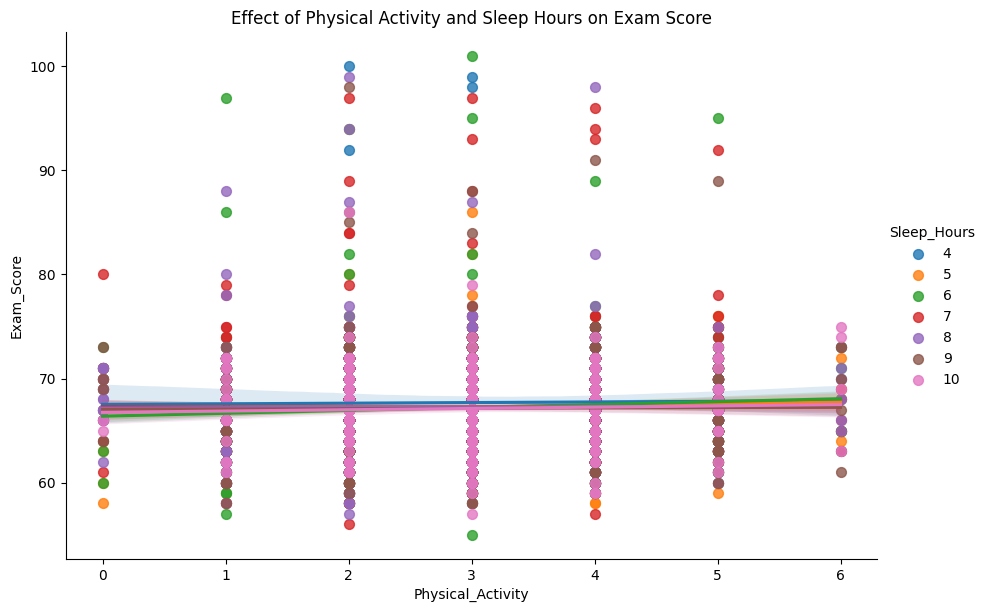

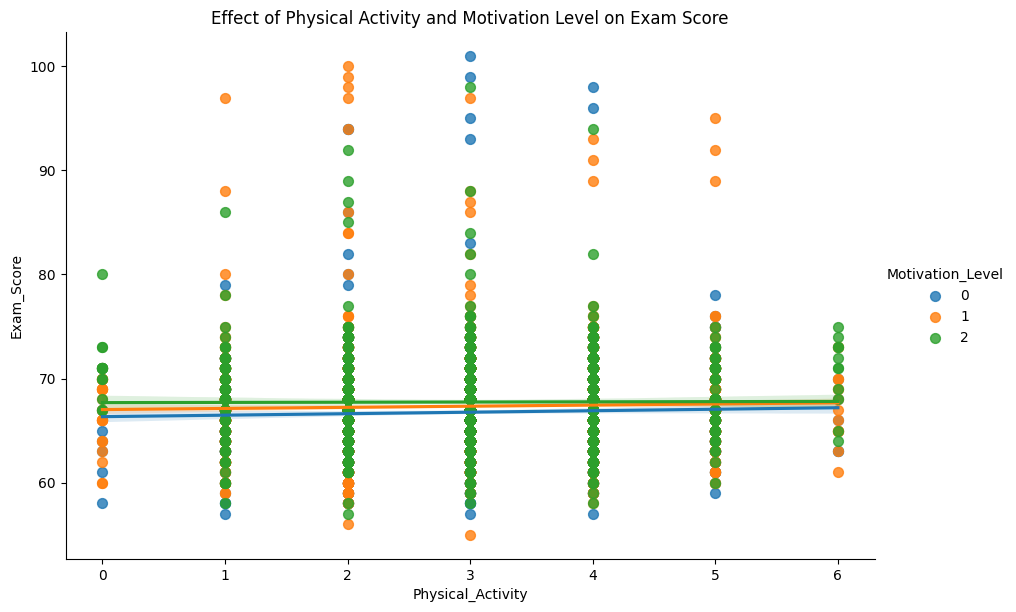

In [18]:
sns.lmplot(x='Physical_Activity', y='Exam_Score', hue='Sleep_Hours', data=df, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title('Effect of Physical Activity and Sleep Hours on Exam Score')
plt.show()

sns.lmplot(x='Physical_Activity', y='Exam_Score', hue='Motivation_Level', data=df, height=6, aspect=1.5, scatter_kws={"s": 50})
plt.title('Effect of Physical Activity and Motivation Level on Exam Score')
plt.show()

Based on the two charts:

- There is no clear relationship between "Physical Activity" and exam scores. Sleep Hours are evenly distributed but do not cause significant changes in exam scores.

- There is no noticeable difference in exam scores across the "Motivation Level" categories when combined with "Physical Activity" levels. Despite color distinctions between groups, the trend lines do not show significant variation, suggesting that "Physical Activity" and "Motivation Level" do not have a strong impact on exam scores.


### 3. Can we predict "Exam Score" using a combination of "Hours Studied", "Parental Involvement", and "School Type"? What features are most influential?

**Purpose**: Tests if we can predict exam scores based on these features and identifies the most influential ones.

**Steps**:
* **Data Preprocessing**: Encode categorical variables ("Parental Involvement" and "School Type") as numeric values.
* **Feature Selection**: Use techniques like correlation analysis, mutual information, or feature importance (from tree-based models like random forests) to identify relevant features.
* **Modeling**: Train a regression model (e.g., Random Forest, Gradient Boosting) to predict exam scores.
* **Model Evaluation**: Evaluate the model's performance using metrics like RMSE or R².

### 4. Is there a significant difference in "Exam Score" between students with different levels of "Internet Access" and "Motivation Level"?

**Purpose**: This question seeks to assess whether internet access and motivation level are associated with significant differences in exam scores.

**Steps**:
* **Data Preprocessing**: Convert categorical variables ("Internet Access" and "Motivation Level") into numeric variables.
* **ANOVA/t-tests**: Conduct an ANOVA or pairwise t-tests to compare exam scores across different groups of internet access and motivation level.
* **Regression Analysis**: Perform post-hoc tests to examine pairwise differences between groups if neccessary
* **Visualization**: Create boxplots or violin plots to visualize score distributions across groups.

### 5. How does "Family Income" correlate with "Exam Score" when "Teacher Quality" and "Extracurricular Activities" are controlled for?

**Purpose**: Explores the relationship between family income and academic performance, controlling for the potential confounding effects of teacher quality and extracurricular activities.

**Steps**:
* **Data Preprocessing**: Convert categorical variables into numeric forms.
* **Correlation Analysis**:  Perform correlation analysis to explore the relationship between "Family Income", "Teacher Quality", "Extracurricular Activities", and "Exam Score".
* **Partial Correlation**: Compute partial correlations to assess the relationship between "Family Income" and "Exam Score" while controlling for other variables.
* **Regression Modeling**: Build a multiple regression model including "Family Income", "Teacher Quality", and "Extracurricular Activities" as predictors of "Exam Score".

### 6. Can we classify students into "High" and "Low" performers using a combination of features, and if so, which features are the most important?

**Purpose**: Aims to build a binary classification model to categorize students based on their exam performance and identify key factors influencing their performance.

**Steps**:
* **Data Preprocessing**: Create a binary target variable by defining high and low performers based on a threshold (e.g., median exam score), process and encode features appropriately.
* **Modeling**:  Train a classification model (e.g., Logistic Regression, Random Forest, or Support Vector Machine) to classify students as "High" or "Low" performers.
* **Evaluation**: Evaluate which features most influence the classification decision and assess the model's performance using accuracy, precision, recall, and F1-score.

### 7. What are the effects of "Gender" and "Peer Influence" on the academic performance of students, particularly on "Exam Score"?

**Purpose**: Explores whether gender and peer influence significantly affect students' exam scores, considering possible interactions between these factors.

**Steps**:
* **Data Preprocessing**: Convert categorical variables into numeric values.
* **Interaction Analysis**: Investigate potential interactions between "Gender" and "Peer Influence" using interaction terms in a regression model.
* **ANOVA/Regression**: Use ANOVA or a regression model to assess the significance of these factors.
* **Visualization**: Create interaction plots to visualize the effects of "Gender" and "Peer Influence" on "Exam_Score".

Coefficients: [-1.93889389e+12  7.10710209e+12  9.50157004e+11 -7.10710209e+12
  9.88736889e+11 -9.71679688e-02 -1.06891632e-01]
Intercept: 66.63275760795376


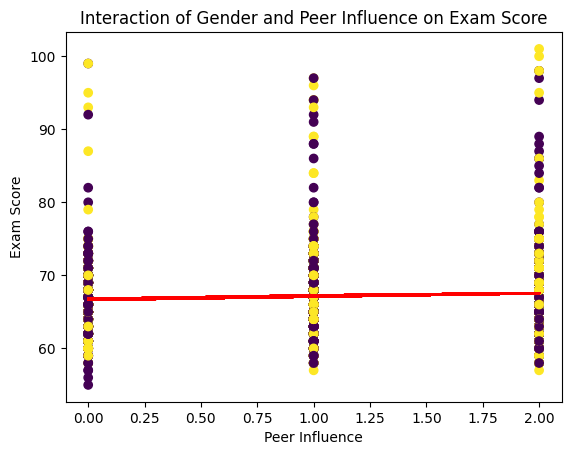

In [19]:
# Create a copy of the dataframe
GP_df = df.copy()

# Create the interaction term using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_transformed = poly.fit_transform(GP_df[['Gender', 'Peer_Influence']])

# Include the original features (without interaction)
X_transformed = np.hstack((GP_df[['Gender', 'Peer_Influence']], X_transformed))

# Perform linear regression
model = LinearRegression().fit(X_transformed, GP_df['Exam_Score'])

# Print some key coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Prediction (optional)
predicted_scores = model.predict(X_transformed)

# Visualization
plt.scatter(GP_df['Peer_Influence'], GP_df['Exam_Score'], c=GP_df['Gender'])
plt.plot(GP_df['Peer_Influence'], predicted_scores, color='red')
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')
plt.title('Interaction of Gender and Peer Influence on Exam Score')
plt.show()

Observation:
- `Peer_Influence` Effect:
    - The regression line is almost flat, indicating that Peer_Influence does not have a strong effect on Exam_Score.
    - This means that regardless of the level of peer influence, the average exam score does not change significantly.

- `Gender` Effect:
    - The distribution of data points (purple and yellow) shows a difference between males and females. However, the regression line is not clearly separated by gender, indicating that gender may not be the main determinant of exam scores in this model.

- `Gender` and `Peer_Influence` Interaction:
    - The model includes an interaction term between `Gender` and `Peer_Influence`.
    - The interaction term is used to test whether peer influence has a different effect on males and females. However, the graph shows that the effect of this interaction term is very small, as the regression line does not vary much by gender.

In [20]:
# Calculate Pearson correlation coefficient between Gender, Peer_Influence and Exam_Score
correlation_gender_exam = GP_df['Gender'].corr(GP_df['Exam_Score'])
correlation_peer_exam = GP_df['Peer_Influence'].corr(GP_df['Exam_Score'])

print(f"Correlation between Gender and Exam_Score: {correlation_gender_exam:.2f}")
print(f"Correlation between Peer_Influence and Exam_Score: {correlation_peer_exam:.2f}")

Correlation between Gender and Exam_Score: 0.00
Correlation between Peer_Influence and Exam_Score: 0.10


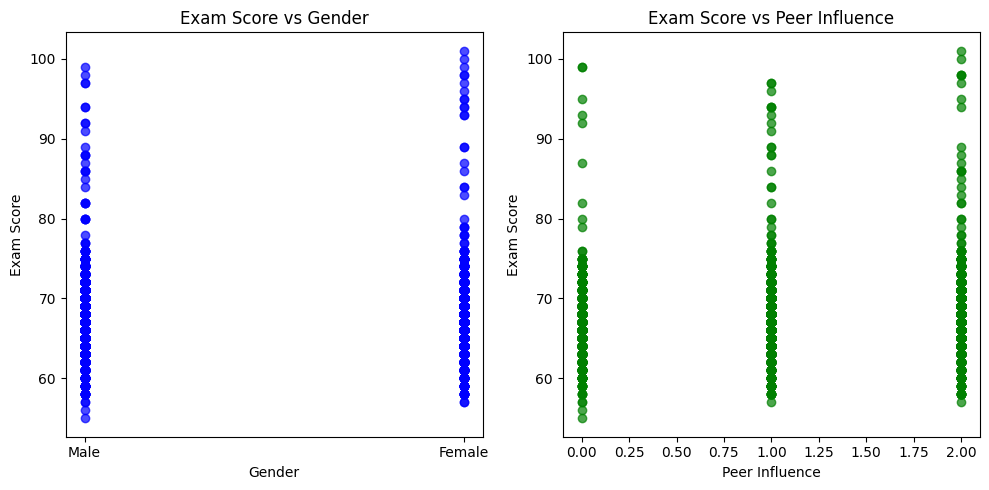

In [21]:
# Chart 1: Exam_Score with Gender
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(GP_df['Gender'], GP_df['Exam_Score'], color='blue', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.title('Exam Score vs Gender')
plt.xticks([0, 1], ['Male', 'Female'])

# Chart 2: Exam_Score vs Peer_Influence
plt.subplot(1, 2, 2)
plt.scatter(GP_df['Peer_Influence'], GP_df['Exam_Score'], color='green', alpha=0.7)
plt.xlabel('Peer Influence')
plt.ylabel('Exam Score')
plt.title('Exam Score vs Peer Influence')

plt.tight_layout()
plt.show()

### 8. How do students' "Distance from Home" and "Sleep Hours" correlate with their academic performance, and what patterns emerge across different "School Types"?

**Purpose**: This question explores how distance from home and sleep hours contribute to exam scores, with consideration for varying patterns across school types (public or private).

**Steps**:
* **Data Preprocessing**: Handle categorical variables like "Distance from Home" and "School Type".
* **Grouping**: Group the data by "School Type" and analyze the correlation between "Distance from Home", "Sleep Hours", and "Exam Score" within each group.
* **Visualizations**: Use scatter plots or grouped bar charts to visualize the correlation and potential patterns across school types.

School Type 0 - Correlation (Distance vs Exam): -0.07
School Type 0 - Correlation (Sleep vs Exam): -0.03
School Type 1 - Correlation (Distance vs Exam): -0.14
School Type 1 - Correlation (Sleep vs Exam): 0.02


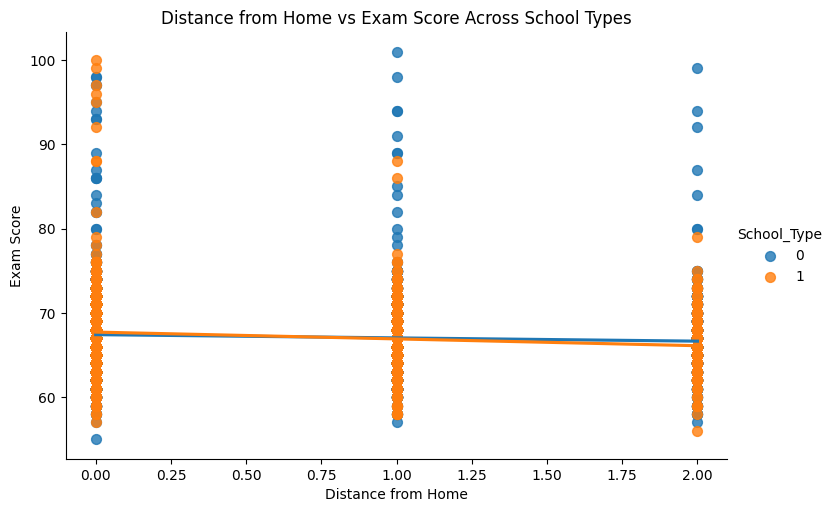

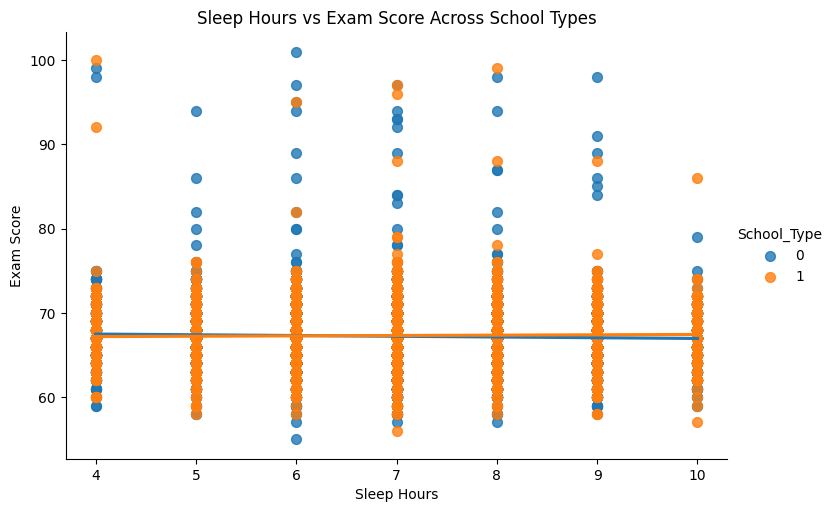

In [22]:
# Group by School_Type
school_groups = df.groupby('School_Type')

# Calculate correlations within each group
for school_type, group in school_groups:
    corr_distance = group['Distance_from_Home'].corr(group['Exam_Score'])
    corr_sleep = group['Sleep_Hours'].corr(group['Exam_Score'])
    print(f"School Type {school_type} - Correlation (Distance vs Exam): {corr_distance:.2f}")
    print(f"School Type {school_type} - Correlation (Sleep vs Exam): {corr_sleep:.2f}")

# Visualization: Scatter plots for each school type
sns.lmplot(
    x="Distance_from_Home",
    y="Exam_Score",
    hue="School_Type",
    data=df,
    aspect=1.5,
    scatter_kws={"s": 50},
    ci=None
)
plt.title("Distance from Home vs Exam Score Across School Types")
plt.xlabel("Distance from Home")
plt.ylabel("Exam Score")
plt.show()

sns.lmplot(
    x="Sleep_Hours",
    y="Exam_Score",
    hue="School_Type",
    data=df,
    aspect=1.5,
    scatter_kws={"s": 50},
    ci=None
)
plt.title("Sleep Hours vs Exam Score Across School Types")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.show()

**Graph 1: Distance from Home and Exam Score**
- Data meaning:
    - Horizontal axis: `Distance_from_Home` (distance from home to school).
    - Vertical axis: `Exam_Score` (exam score).
    - Colors: Type 0 schools (blue) and Type 1 schools (orange).
- Comments:
    - Low correlation: The values ​​of `Distance_from_Home` do not affect `Exam_Score` much, as the scores do not change significantly when the distance from home to school changes.
    - The regression line is almost flat for both types of schools:
        - Type 0 schools: Correlation coefficient is -0.07 → Very weak relationship, almost non-existent.
        - Type 1 schools: Correlation coefficient is -0.14 → Weak relationship, indicating that longer distances may have a very small, but insignificant, impact on exam scores.

**Graph 2: Sleep Hours and Exam Score**
- Data meaning:
    - Horizontal axis: `Sleep_Hours` (number of hours of sleep).
    - Vertical axis: `Exam_Score` (number of scores).
    - Colors: Type 0 schools (blue) and Type 1 schools (orange).
- Comments:
    - Weak correlation: The regression line is almost flat for both types of schools.
        - Type 0 schools: Correlation coefficient is -0.03 → There is no significant relationship between sleep hours and exam scores.
        - Type 1 schools: Correlation coefficient is 0.02 → The relationship is almost non-existent, as the difference in sleep hours does not affect the scores much.

**Result meaning**
- Distance from home to school (`Distance_from_Home`):
    - The relationship between distance from home to school and exam scores is very weak or non-existent.
    - This may be due to students adapting to the distance from home to school (such as taking the bus or moving closer).
- Sleep hours (`Sleep_Hours`):
    - The relationship between sleep hours and test scores is also very weak, indicating that sleep hours (within the normal range) are not a determinant of test scores.
- Differences between school types (`School_Type`):
    - Although the graphs are classified by school types 0 and 1, differences in school types do not show a clear effect on the relationship between variables (distance, sleep hours) and test scores.